In [1]:
import multiprocessing
from astropy.io import ascii
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy import asarray as ar, exp
from scipy.optimize import curve_fit, least_squares
import re
%matplotlib inline

snls_colors = {"sdssg":"darkgreen", "sdssi":"darkblue", "sdssr":"darkred", "sdssz":"purple"}
base_colors = {"sdssg":"green", "sdssi":"blue", "sdssr":"red", "sdssz":"magenta"}

import astropy.coordinates as coord
import astropy.units as u
import Utils.DiaSourceTools as DSTools

import sncosmo

In [11]:
def show_multi_filter_light_curve(t, colors, n_factor = None, conv='.'):
   
    t_by_filter = t.group_by("bandpass")

    indices = t_by_filter.groups.indices
    
    #print indices
    for i in range(0, len(indices)-1):
        
        data = t_by_filter[indices[i]:indices[i+1]]
        
        if n_factor is not None:
            value = n_factor[data[0]["bandpass"]]
            f = value if np.isnan(value) == False else 1
            plt.errorbar(data["mjd"], data["flux"]*f,yerr=data["flux_error"]*f, fmt=conv, markersize='5', label=data[0]["bandpass"], c=colors[data[0]["bandpass"]])            
        else:
            plt.errorbar(data["mjd"], data["flux"],yerr=data["flux_error"], fmt=conv, markersize='5', label=data[0]["bandpass"], c=colors[data[0]["bandpass"]])
    plt.legend()
    #plt.show()

In [3]:
lienObj = glob.glob("/datadec/cppm/jpreyes/CFHT_Production/light_curves_corrected_3/*.dat")

In [4]:
def f(obj):
    table = ascii.read(obj)
    return table

In [5]:
import multiprocessing
try:
    pool = multiprocessing.Pool()
    res =  pool.map(f, lienObj)
finally:
    pool.close()

In [8]:
f = open('/renoir_data_02/jpreyes/lsst_data/sn_control/J_A+A_523_A7_table9.dat.txt','r')
data_elems = f.read()
#elems = re.findall('^(.*?D3.*?)\\|(.*?)\\|', data_elems, re.MULTILINE)
elems = re.findall('^(05D3.*?)\\|(.*?)\\|(.*?)\\|(.*?)\\|(.*?)\\|(.*?)\\|(.*?)\\|', data_elems, re.MULTILINE)
f.close()

f = open('/renoir_data_02/jpreyes/lsst_data/sn_control/J_A+A_523_A7_table10.dat.txt','r')
data = f.read()
f.close()

In [9]:
snls_array = []
for sn in elems:

        c = coord.SkyCoord(sn[1], unit=(u.hourangle, u.deg))
        
        m = re.findall('^'+str(sn[0])+'\\|(r|g|z|i)\\|(.*?)\\|(.*?)\\|(.*?)$', data, re.MULTILINE)
        
        snls_lc = DSTools.build_light_curve_from_snls_file_2(m, c, sn[0], sn[-1])

        if len(m)>0:
            #print sn[0], c.ra.deg, c.dec.deg

            #plt.errorbar(snls_lc['mjd'], snls_lc['flux'], yerr=snls_lc['flux_error'], fmt='.', color='blue')
            #show_multi_filter_light_curve(snls_lc, snls_colors)
            plt.show()
            snls_array.append(snls_lc)

print("total of sn:" + str(len(snls_array)))

total of sn:33


In [10]:
s_candidates = res
matches_sc = DSTools.match_with_lc(snls_array, s_candidates)

14395
21812
21905
4987
6284
17006
8624
1294
1336
4192
4203
8600
2130
23014
23790
8651
9829
7802
19420
4392
5698
20154
21222
22184
6782
13338
13396
14526
14583
11415
12011
6797
6845
6852
7097
20914
4148
37


mjd,dec,zpsys,flux,ra,flux_error,z,zp,id,bandpass
float64,float64,str2,float64,float64,float64,str6,float64,str6,str5
53494.47,0.915929011048,ab,57.599,3.76285132748,27.635,0.4610,25.0,05D3lc,sdssi
53494.51,0.915929011048,ab,14.742,3.76285132748,22.729,0.4610,25.0,05D3lc,sdssr
53495.42,0.915929011048,ab,-35.031,3.76285132748,17.406,0.4610,25.0,05D3lc,sdssr
53495.44,0.915929011048,ab,4.117,3.76285132748,7.7887,0.4610,25.0,05D3lc,sdssg
53495.47,0.915929011048,ab,-12.432,3.76285132748,55.896,0.4610,25.0,05D3lc,sdssz
53498.36,0.915929011048,ab,-93.399,3.76285132748,33.407,0.4610,25.0,05D3lc,sdssi
53498.38,0.915929011048,ab,-50.377,3.76285132748,17.262,0.4610,25.0,05D3lc,sdssr
53500.31,0.915929011048,ab,-10.603,3.76285132748,5.7905,0.4610,25.0,05D3lc,sdssg
53502.28,0.915929011048,ab,-115.23,3.76285132748,45.723,0.4610,25.0,05D3lc,sdssz


05D3ax


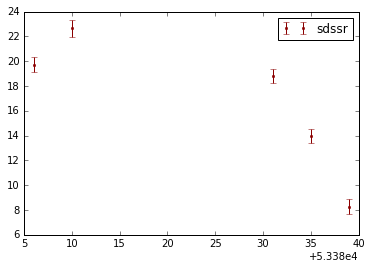

05D3cf


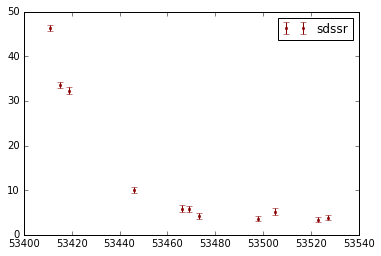

05D3cf


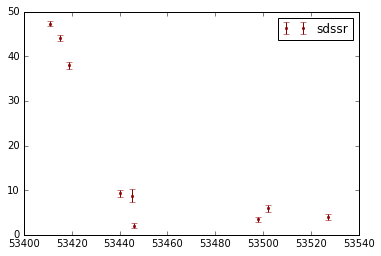

05D3ci


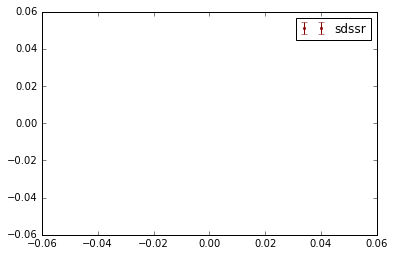

05D3ci


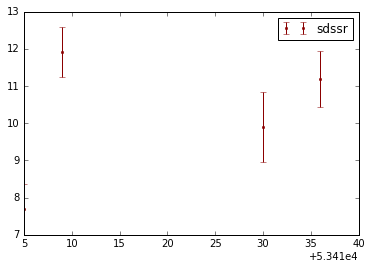

05D3cq


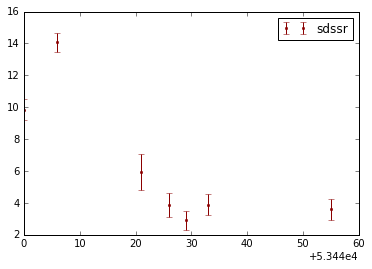

05D3cx


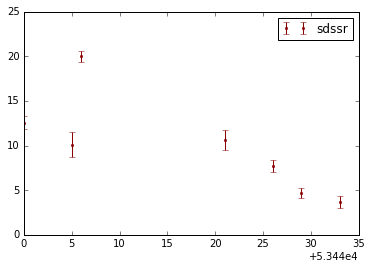

05D3dd


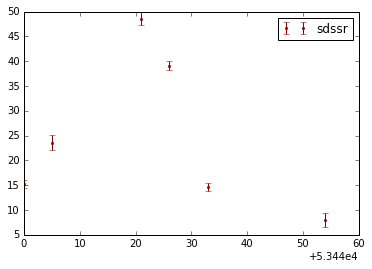

05D3dd


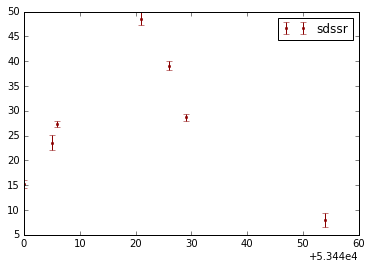

05D3dd


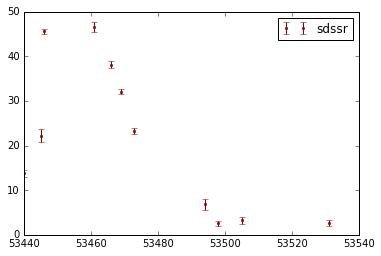

05D3dd


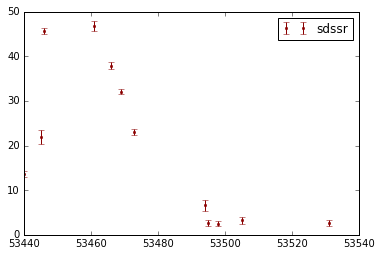

05D3dh


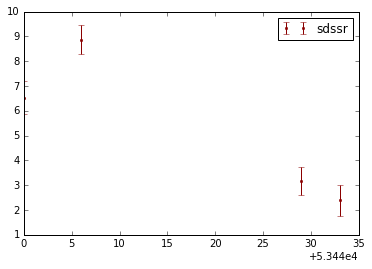

05D3gp


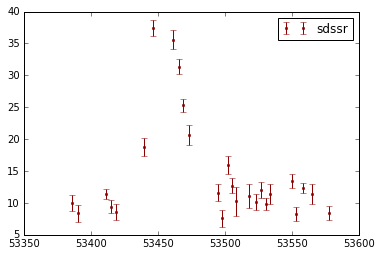

05D3gy


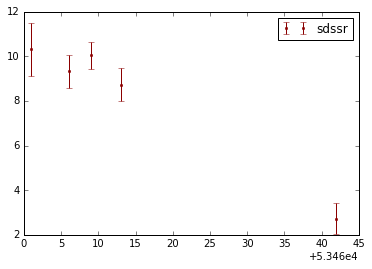

05D3gy


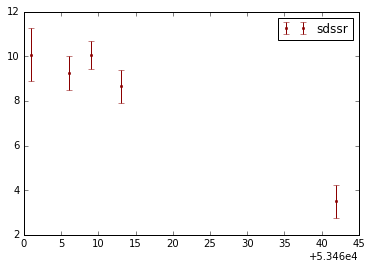

05D3ha


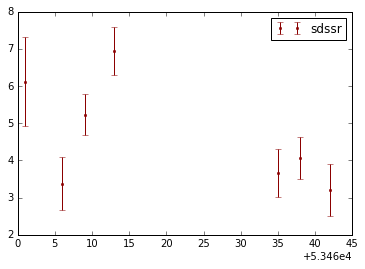

05D3ha


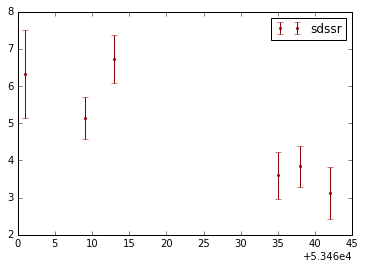

05D3hs


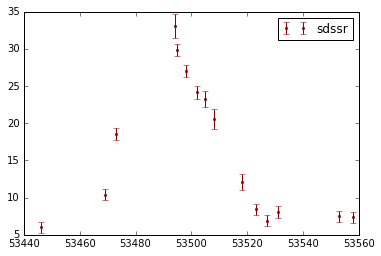

05D3ht


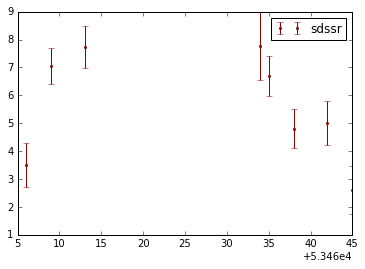

05D3jb


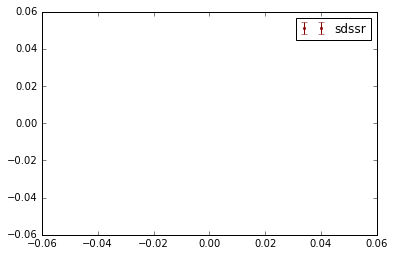

05D3jb


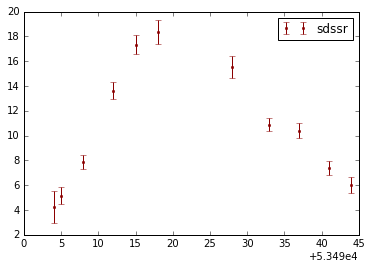

05D3jh


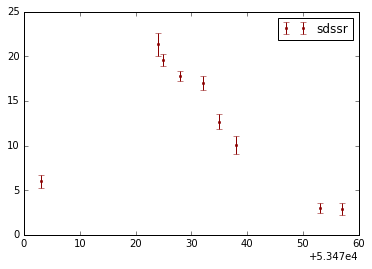

05D3jh


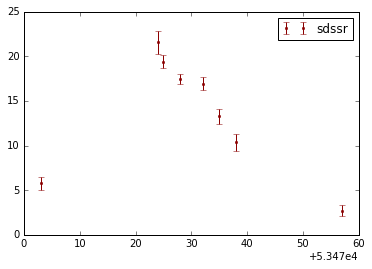

05D3jk


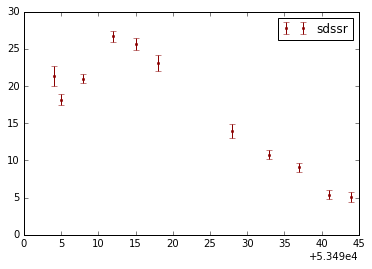

05D3jq


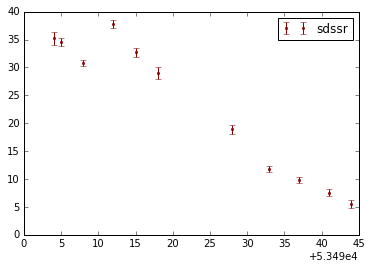

05D3jr


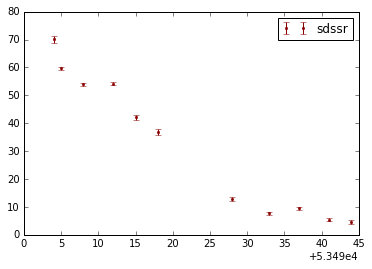

05D3jr


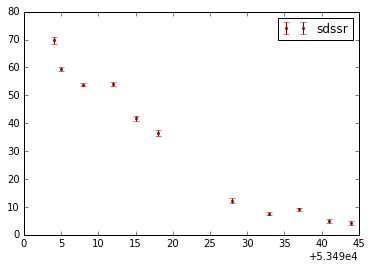

05D3jr


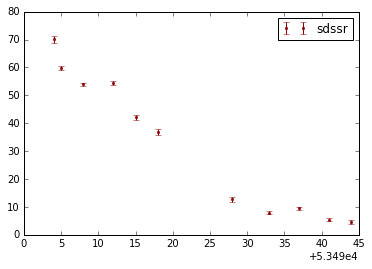

05D3jr


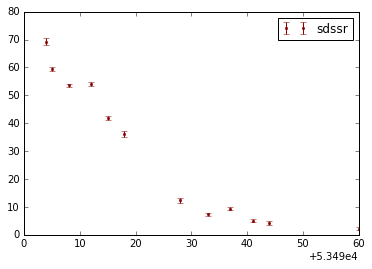

05D3kp


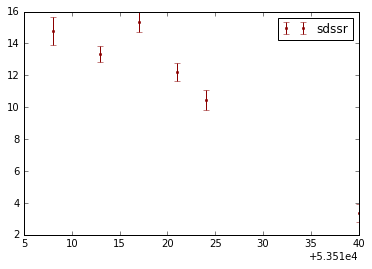

05D3kt


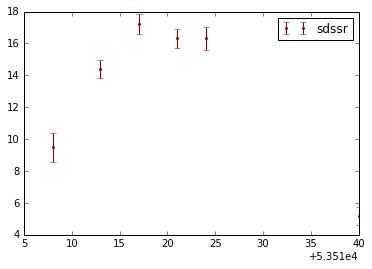

05D3kx


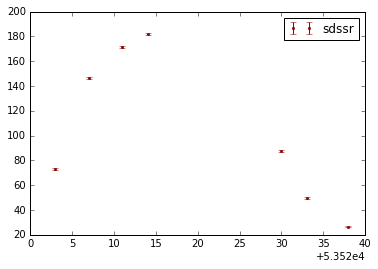

05D3kx


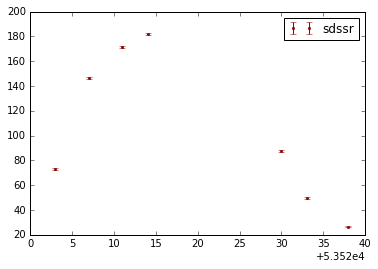

05D3kx


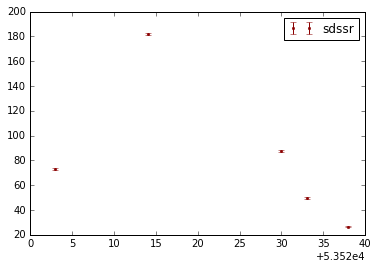

05D3la


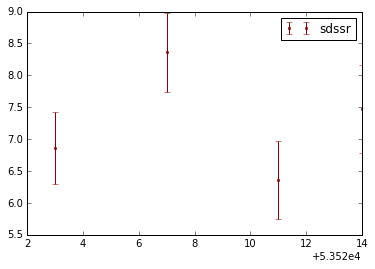

05D3lb


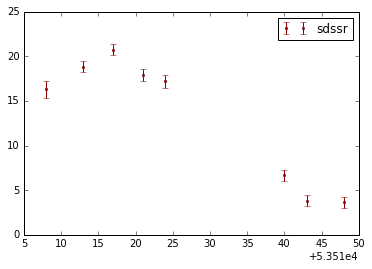

05D3lc


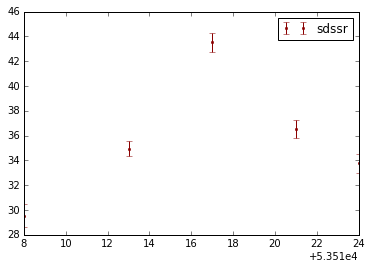

In [17]:
for control, match in matches_sc:
    print control[0]["id"]
    show_multi_filter_light_curve(match, snls_colors)
    plt.show()


In [19]:
count = 0
last = ""
for control, match in matches_sc:
    if control[0]["id"] != last:
        count+=1
    last = control[0]["id"]
print count

23


In [ ]:
c[0]["id"]